In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
adult_data = pd.read_csv("./adult.csv")

In [5]:
#how big is our data
adult_data.shape

(48842, 15)

In [6]:
#what does it look like
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
#what are the mean, std, min, max, QRT
adult_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#are we missing data
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
#what are our target unique values
np.unique(adult_data.income)

array(['<=50K', '>50K'], dtype=object)

In [12]:
#The data is in terms of the the individual makes more or less than $50,000

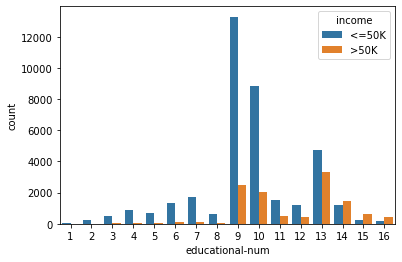

In [14]:
#is there any correlation between income and any of our fields
import seaborn as sns
ax = sns.countplot(x='educational-num', hue='income', data= adult_data)

In [17]:
#Are these numbers exact. answer no
(adult_data['educational-num'].append(adult_data['education'])).unique()

array([7, 9, 12, 10, 6, 15, 4, 13, 14, 16, 3, 11, 5, 8, 2, 1, '11th',
       'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school',
       '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th',
       'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'], dtype=object)

In [18]:
#Ask the individual completes more education they have a better percentage of making above 50k compared to making less.
#It's not until completing a bachelor's degree that the individual has better than 30% odds

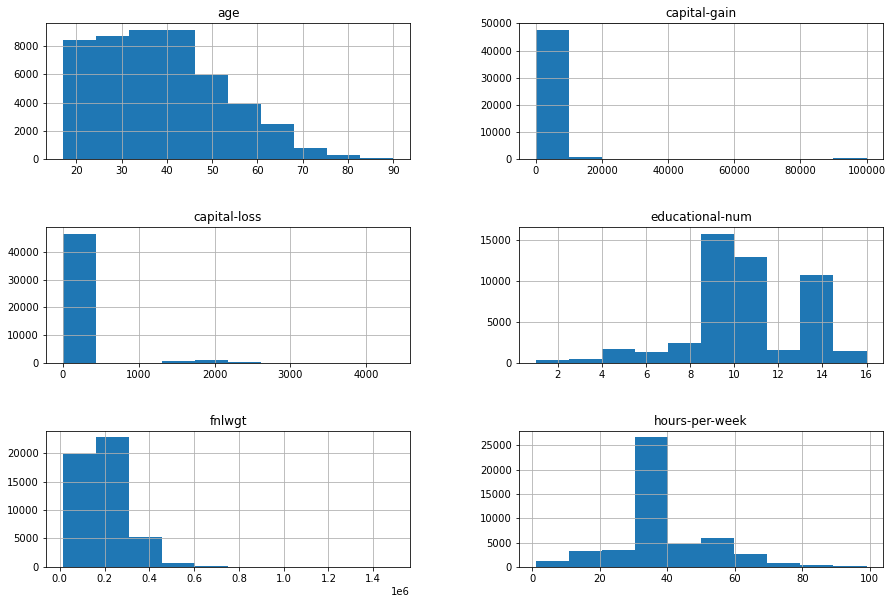

In [19]:
#what do our numeric fields distributions look like
adult_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5)

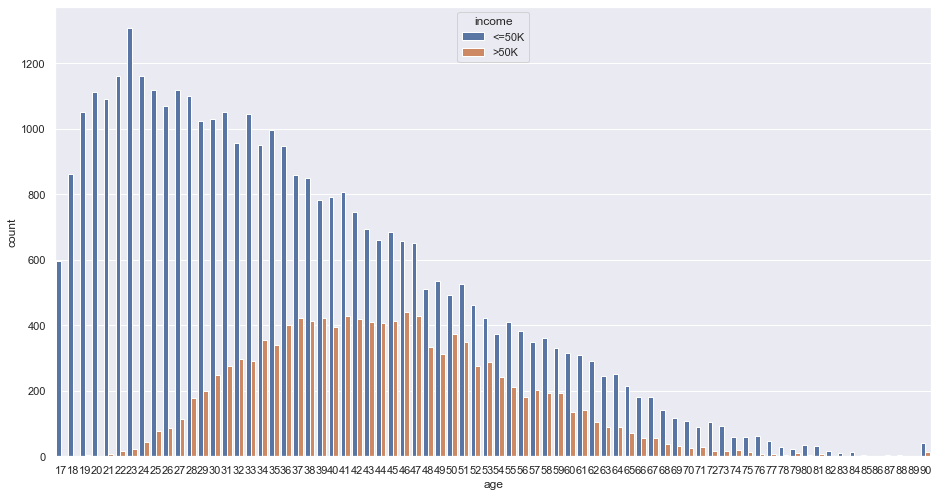

In [39]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.countplot(x='age', hue='income', data= adult_data)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

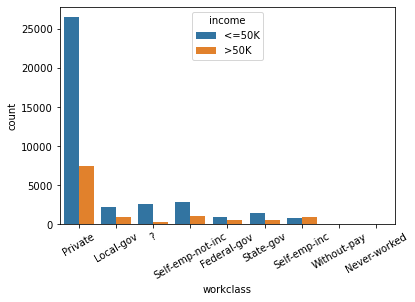

In [31]:
#age does seem to follow the education as you can only get higher chances of being in the 50k+ at specific ages because the education takes that long to achieve
ax = sns.countplot(x='workclass', hue='income', data= adult_data)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

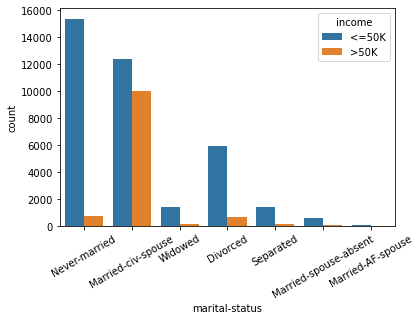

In [34]:
#large group working for private companys, self employed have high ratio 50K+
ax = sns.countplot(x='marital-status', hue='income', data= adult_data)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

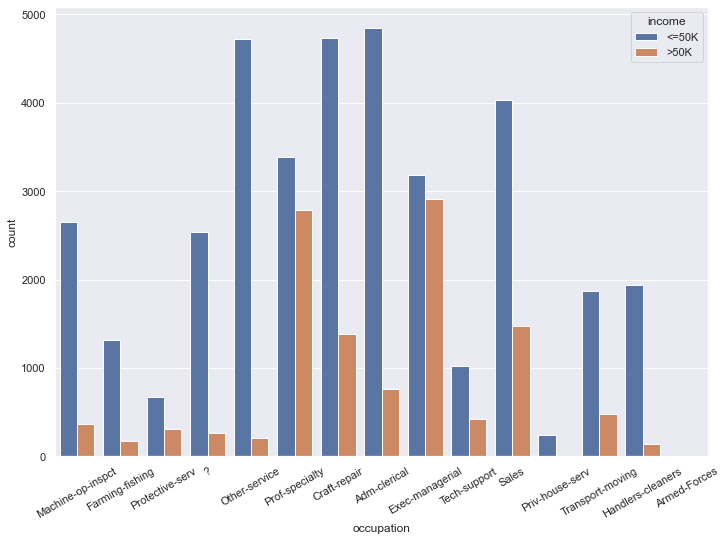

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x='occupation', hue='income', data= adult_data)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

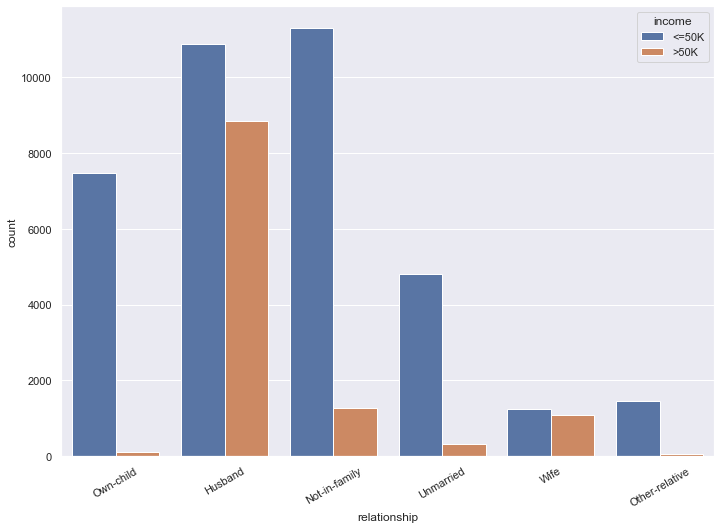

In [40]:
#specific jobs would show higher earning
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x='relationship', hue='income', data= adult_data)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

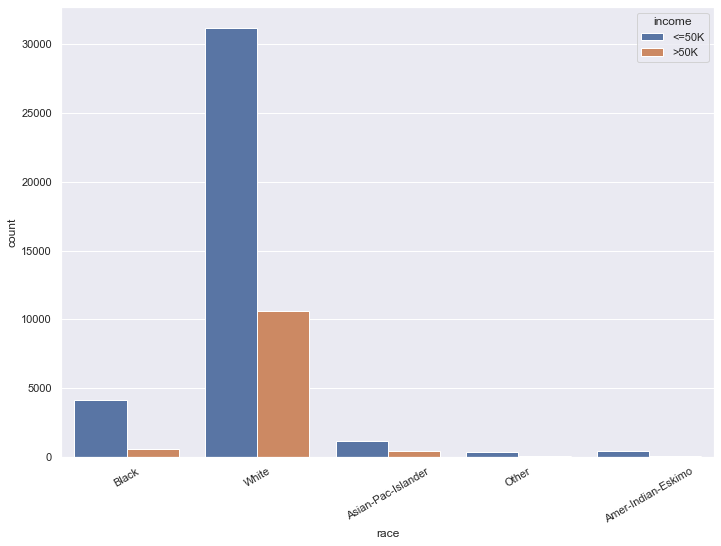

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x='race', hue='income', data= adult_data)
plt.xticks(rotation=30)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

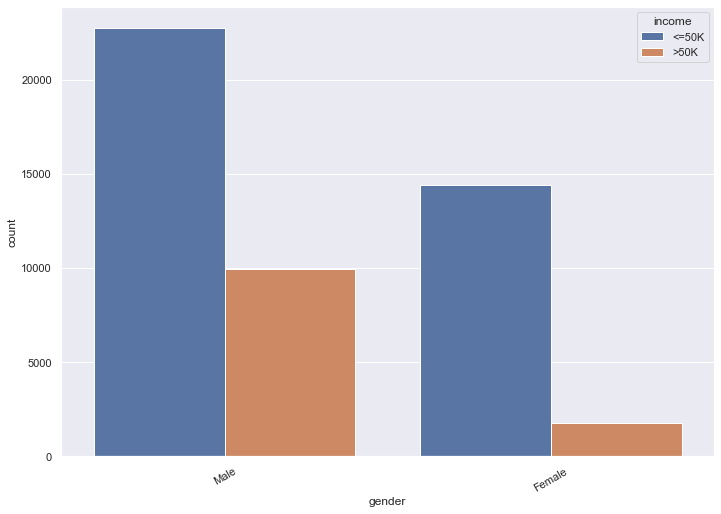

In [42]:
#not sure there is enough data from non-white individuals to use this feature 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x='gender', hue='income', data= adult_data)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

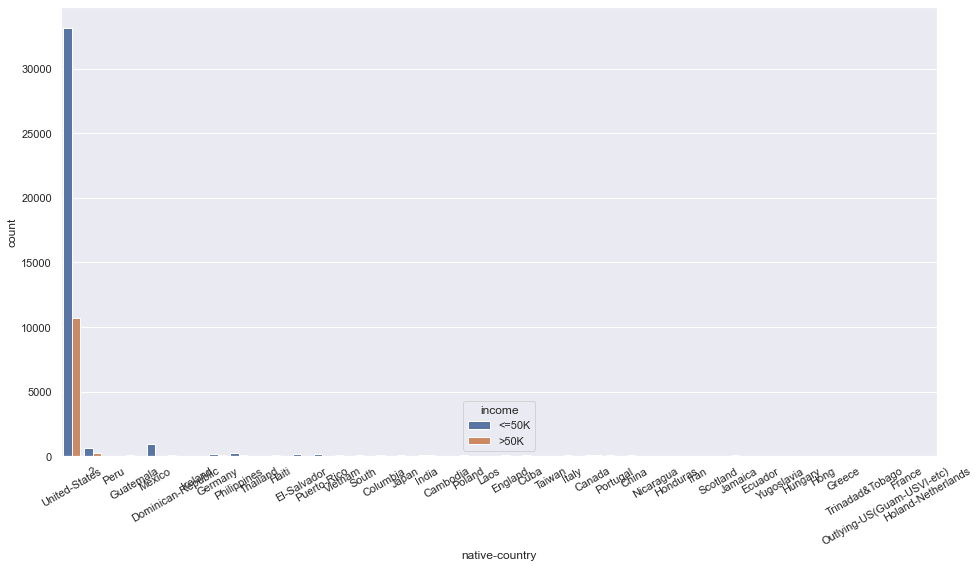

In [45]:
#could show a pay gap
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.countplot(x='native-country', hue='income', data= adult_data)
plt.xticks(rotation=30)

In [47]:
#native country is not very useful to us.